In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:

# Load the dataset
file_path = r"amazon.csv"
amazon_df = pd.read_csv(file_path, encoding="iso-8859-1")

# Display the first few rows of the dataset to understand its structure
amazon_df.head()





,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â¹399,"â¹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â¹199,â¹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â¹199,"â¹1,899",90%,3.9,"7,928",ã Fast Charger& Data Syncã-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,â¹329,â¹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,â¹154,â¹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
noise_list = ["is", "a", "this", "..."]

def _remove_noise(input_text):
    words = input_text.split()
    noise_free_words = [word for word in words if word not in noise_list]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text


In [4]:
# Lower Case
amazon_df['review_content'] = amazon_df['review_content']\
            .apply(lambda x: " ".join(x.lower() for x in x.split()))
amazon_df['review_content'].head()

0    looks durable charging is fine toono complains...
1    i ordered this cable to connect my phone to an...
2    not quite durable and sturdy,https://m.media-a...
3    good product,long wire,charges good,nice,i bou...
4    bought this instead of original apple, does th...
Name: review_content, dtype: object

In [5]:
import re

# Function to remove punctuation and URLs
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the function to the review_content column
amazon_df['review_content'] = amazon_df['review_content'].apply(clean_text)
amazon_df['review_content'].head()


0    looks durable charging is fine toono complains...
1    i ordered this cable to connect my phone to an...
2    not quite durable and sturdy good nice product...
3    good productlong wirecharges goodnicei bought ...
4    bought this instead of original apple does the...
Name: review_content, dtype: object

In [6]:
# Removing Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
amazon_df['review_content'] = amazon_df['review_content']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
amazon_df['review_content'].head()

0    looks durable charging fine toono complainscha...
1    ordered cable connect phone android auto car c...
2    quite durable sturdy good nice productworking ...
3    good productlong wirecharges goodnicei bought ...
4    bought instead original apple work 150rs fast ...
Name: review_content, dtype: object

In [7]:
# Word Tokenization
from nltk.tokenize import word_tokenize

print(amazon_df['review_content'].iloc[0])
tokens = word_tokenize(amazon_df['review_content'].iloc[0])
print(tokens)

looks durable charging fine toono complainscharging really fast good producttill satisfied qualitythis good product charging speed slower original iphone cablegood quality would recommend worked well till date issuecable also sturdy enoughhave asked replacement company samevalue money
['looks', 'durable', 'charging', 'fine', 'toono', 'complainscharging', 'really', 'fast', 'good', 'producttill', 'satisfied', 'qualitythis', 'good', 'product', 'charging', 'speed', 'slower', 'original', 'iphone', 'cablegood', 'quality', 'would', 'recommend', 'worked', 'well', 'till', 'date', 'issuecable', 'also', 'sturdy', 'enoughhave', 'asked', 'replacement', 'company', 'samevalue', 'money']


In [8]:
# Frequency Distribution
from nltk.probability import FreqDist

fdist = FreqDist(tokens)
fdist.most_common(2)

[('charging', 2), ('good', 2)]

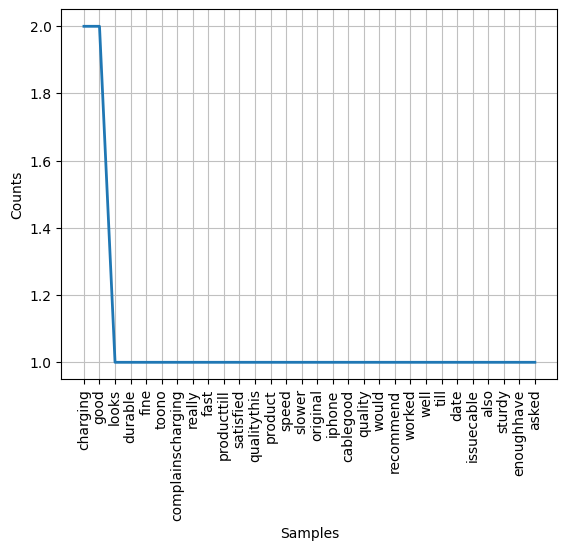

In [9]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30, cumulative=False)
plt.show()

In [10]:
# Stemming
from nltk.stem import PorterStemmer

st = PorterStemmer()
amazon_df['review_content'][:5].apply(lambda x: " "\
                            .join([st.stem(word) for word in x.split()]))

0    look durabl charg fine toono complainscharg re...
1    order cabl connect phone android auto car cabl...
2    quit durabl sturdi good nice productwork welli...
3    good productlong wirecharg goodnicei bought ca...
4    bought instead origin appl work 150r fast appl...
Name: review_content, dtype: object

In [11]:
# Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
amazon_df['review_content'][:5].apply(lambda x: " "\
                            .join([lem.lemmatize(word, "v") \
                                for word in x.split()]))

0    look durable charge fine toono complainschargi...
1    order cable connect phone android auto car cab...
2    quite durable sturdy good nice productworking ...
3    good productlong wirecharges goodnicei buy cab...
4    buy instead original apple work 150rs fast app...
Name: review_content, dtype: object

In [12]:
amazon_df['review_content'][:5].apply(lambda x: " "\
                            .join([lem.lemmatize(word, "n") \
                                for word in x.split()]))

0    look durable charging fine toono complainschar...
1    ordered cable connect phone android auto car c...
2    quite durable sturdy good nice productworking ...
3    good productlong wirecharges goodnicei bought ...
4    bought instead original apple work 150rs fast ...
Name: review_content, dtype: object

In [13]:
# Object Standardization
lookup_dict = {'rt':'Retweet', 'dm':'direct message', \
               'awsm':'awesome', 'luv':'love'}

def _lookup_words(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]

        new_words.append(word)
        new_text = " ".join(new_words)

    return new_text



In [14]:
from nltk import word_tokenize, pos_tag

# Function to apply POS tagging
def pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

# Apply POS tagging to the review_content column
amazon_df['pos_tags'] = amazon_df['review_content'].apply(pos_tagging)


In [15]:
from textblob import TextBlob

# Function to generate N-grams
def generate_ngrams(text, n=3):
    blob = TextBlob(text)
    return blob.ngrams(n)

# Apply N-grams function to the review_content column
amazon_df['ngrams'] = amazon_df['review_content'].apply(generate_ngrams)


In [16]:
## Statistical Features
# Term frequency (TF)
tf1 = (amazon_df['review_content'][1:2]).apply(lambda x: \
                    pd.value_counts(x.split(" ")))\
                    .sum(axis = 0).reset_index()
tf1.columns = ['words', 'tf']
tf1.head()

C:\Users\sam\AppData\Local\Temp\ipykernel_24568\194094715.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(x.split(" ")))\
C:\Users\sam\AppData\Local\Temp\ipykernel_24568\194094715.py:4: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.value_counts(x.split(" ")))\


,words,tf
0,cable,7
1,charging,5
2,good,4
3,quality,3
4,connected,3


In [17]:
# Inverse Document Frequency (IDF)
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(amazon_df.shape[0]/\
                        (len(amazon_df[amazon_df['review_content']\
                        .str.contains(word)])))

tf1.head()

,words,tf,idf
0,cable,7,1.326031
1,charging,5,1.457728
2,good,4,0.036140
3,quality,3,0.418519
4,connected,3,2.437580


In [18]:
# TF-IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

,words,tf,idf,tfidf
0,cable,7,1.326031,9.282218
1,charging,5,1.457728,7.288640
2,good,4,0.036140,0.144561
3,quality,3,0.418519,1.255558
4,connected,3,2.437580,7.312741


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                                   stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(amazon_df['review_content'])
print(tfidf_matrix)



  (0, 545)	0.1563726764244042
  (0, 169)	0.23284132715139785
  (0, 728)	0.2334009462290555
  (0, 55)	0.29444586839129916
  (0, 845)	0.19149068327461138
  (0, 214)	0.2840221901752629
  (0, 885)	0.2235004415557069
  (0, 974)	0.23866212001643528
  (0, 716)	0.19549230578100518
  (0, 696)	0.10068905706772881
  (0, 428)	0.2591745937283722
  (0, 595)	0.2166103952742598
  (0, 819)	0.19454719048926897
  (0, 675)	0.08264506685565026
  (0, 755)	0.2235004415557069
  (0, 345)	0.14928348165531236
  (0, 298)	0.17020985881096157
  (0, 709)	0.15797498311065875
  (0, 309)	0.16601133873711127
  (0, 140)	0.3340726245326341
  (0, 259)	0.23228639113346158
  (0, 494)	0.17174447694672668
  (1, 638)	0.10211510955703616
  (1, 404)	0.12291828578848406
  (1, 662)	0.0882619067062534
  :	:
  (1464, 269)	0.03446285132779588
  (1464, 619)	0.027047773883137546
  (1464, 922)	0.041736904148324636
  (1464, 746)	0.02987453470677478
  (1464, 918)	0.028916633123163588
  (1464, 994)	0.08524418411814177
  (1464, 997)	0.127866

In [20]:
# Function to apply TextBlob sentiment analysis
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment


amazon_df['textblob_sentiment'] = amazon_df['review_content'].apply(get_textblob_sentiment)
print(amazon_df['textblob_sentiment'] )

0         (0.48194444444444445, 0.6750000000000002)
1         (0.22296650717703348, 0.5204146730462519)
2          (0.6333333333333333, 0.8666666666666667)
3          (0.3333333333333333, 0.6142857142857144)
4         (0.33529380341880344, 0.6354415954415955)
                           ...                     
1460      (0.31025641025641026, 0.5801282051282051)
1461       (0.1450980392156863, 0.5862745098039216)
1462      (0.23153846153846155, 0.6684615384615384)
1463    (-0.13416666666666668, 0.43999999999999995)
1464       (0.4395833333333333, 0.6604166666666667)
Name: textblob_sentiment, Length: 1465, dtype: object


In [21]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


# download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to apply sentiment analysis
def get_sentiment(text):
    # Ensure text is a string
    text = str(text)
    return sia.polarity_scores(text)['compound']

# Apply the sentiment analysis function to the text data column
# Replace 'review_content' with your actual text data column name
amazon_df['sentiment'] = amazon_df['review_content'].apply(get_sentiment)

# Display the first few rows of the dataset with sentiment scores
amazon_df[['review_content', 'sentiment']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review_content,sentiment
0,looks durable charging fine toono complainscha...,0.9419
1,ordered cable connect phone android auto car c...,0.9744
2,quite durable sturdy good nice productworking ...,0.8300
3,good productlong wirecharges goodnicei bought ...,0.9371
4,bought instead original apple work 150rs fast ...,0.9930


In [29]:
import pandas as pd
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

def word_feats(words):
    return dict([(word, True) for word in words])

# Load positive vocabulary from an Excel file
positive_vocab = pd.read_excel('positive_words.xlsx')
# Assuming the words are in the first column, convert them to a list
positive_vocab = positive_vocab[positive_vocab.columns[0]].tolist()

negative_vocab = ['bad', 'terrible', 'useless', 'hate', ':(']
neutral_vocab = ['movie', 'the', 'sound', 'was', 'is', 'actors', 'did', 'know', 'words', 'not']

positive_features = [(word_feats([pos]), 'pos') for pos in positive_vocab]
negative_features = [(word_feats([neg]), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats([neu]), 'neu') for neu in neutral_vocab]

train_set = negative_features + positive_features + neutral_features

classifier = NaiveBayesClassifier.train(train_set)

# Predict
neg = 0
pos = 0
sentence = "Awesome movie, I liked it"
sentence = sentence.lower()
words = sentence.split(' ')

for word in words:
    classResult = classifier.classify(word_feats([word]))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1

print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))


Positive: 1.0
Negative: 0.0


In [ ]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob

# Training and test data
training_corpus = [('Text from your dataset', 'Class_A'), ('Another text', 'Class_B')]
test_corpus = [('Test text from your dataset', 'Class_A'), ('Another test text', 'Class_B')]

# Train Naive Bayes Classifier
model = NBC(training_corpus)

# Function to classify new text
def classify_text(text):
    return model.classify(text)

# Apply to  DataFrame
amazon_df['textblob_classification'] = amazon_df['review_content'].apply(classify_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import svm

# Assuming you have a column in amazon_df for labels
labels = amazon_df['your_label_column']

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)

# Train the feature vectors
X = vectorizer.fit_transform(amazon_df['review_content'])

# Train SVM
model = svm.SVC(kernel='linear')
model.fit(X, labels)

# Prediction (on the same data for simplicity)
predictions = model.predict(X)

# Add predictions to DataFrame
amazon_df['svm_classification'] = predictions


In [ ]:
# Checking for missing values
missing_values = amazon_df.isnull().sum()

# Checking for duplicates
duplicates = amazon_df.duplicated().sum()

missing_values, duplicates

In [ ]:
# Function to convert price and discount percentage columns to numeric
def convert_to_numeric(column):
    return pd.to_numeric(column.str.replace('[^0-9.]', '', regex=True))




In [ ]:
# Convert 'discounted_price', 'actual_price', and 'discount_percentage' to numeric
amazon_df['discounted_price'] = convert_to_numeric(amazon_df['discounted_price'])
amazon_df['actual_price'] = convert_to_numeric(amazon_df['actual_price'])
amazon_df['discount_percentage'] = convert_to_numeric(amazon_df['discount_percentage'])



In [ ]:
# Replace non-numeric entries in 'rating' with NaN and then convert to numeric
# You can also use 'mean', 'median', or any other statistical measure if you don't want to use NaN
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# If you want to remove rows with non-numeric 'rating' instead of replacing with NaN
# amazon_df = amazon_df[pd.to_numeric(amazon_df['rating'], errors='coerce').notna()]

# Convert 'rating_count', handling commas and coercing errors
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'].str.replace(',', ''), errors='coerce')

# Rechecking the data types after conversion
updated_data_types = amazon_df.dtypes

updated_data_types


In [ ]:
# Identifying non-numeric entries in the 'rating' column

# Convert 'rating' column to string
amazon_df['rating'] = amazon_df['rating'].astype(str)

# Identifying non-numeric entries in the 'rating' column
non_numeric_ratings = amazon_df[~amazon_df['rating'].str.replace('.', '', regex=True).str.isnumeric()]['rating']

non_numeric_ratings.unique()



In [ ]:
# Removing rows where 'rating' contains '|'
amazon_df = amazon_df[amazon_df['rating'] != '|']

# Converting 'rating' to numeric
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# Recheck the data types after conversion
updated_data_types = amazon_df.dtypes

updated_data_types


In [ ]:
amazon_df.head(6)

In [ ]:
# Remove rows with any missing values
amazon_df = amazon_df.dropna()

# Check the updated dataset for missing values
updated_missing_values = amazon_df.isnull().sum()
updated_missing_values
